In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('heartdiseases.csv')

In [3]:
data.head()

,Age,Gender,Education,Income,Smoker,Cholesterol,Heart_Disease
0,42,Female,Bachelor's Degree,65000,No,180,No
1,55,Male,High School Diploma,40000,Yes,245,Yes
2,30,Female,Master's Degree,80000,Yes,210,No
3,39,Male,Some College,50000,Yes,195,No
4,27,Male,Some College,30000,No,170,No


In [4]:
#Heart_Disease column is our dependent variable which we will predict using the other independent variable
#before building the logistic regression model we will need to convert categorical variables into numerical variables
#so we will be using OneHot Encodeing 


In [5]:
data= pd.get_dummies(data, columns=['Gender','Education', 'Smoker'], drop_first = True)
data
#drop_first is set to True to avoid the dummy variable trap


,Age,Income,Cholesterol,Heart_Disease,Gender_Male,Education_Doctorate Degree,Education_High School Diploma,Education_Master's Degree,Education_Some College,Smoker_Yes
0,42,65000,180,No,False,False,False,False,False,False
1,55,40000,245,Yes,True,False,True,False,False,True
2,30,80000,210,No,False,False,False,True,False,True
3,39,50000,195,No,True,False,False,False,True,True
4,27,30000,170,No,True,False,False,False,True,False
5,46,90000,200,Yes,False,True,False,False,False,False
6,35,55000,190,No,True,False,False,False,True,False
7,48,42000,225,Yes,False,False,True,False,False,True
8,29,70000,185,No,True,False,False,False,False,True
9,54,48000,235,Yes,False,False,False,False,True,False


In [6]:
X=data.drop('Heart_Disease',axis=1)
Y=data['Heart_Disease']
X_train, X_test ,Y_train ,Y_test = train_test_split(X,Y,test_size=0.3 ,random_state=42) 

In [7]:
Log_reg= LogisticRegression()
Log_reg.fit(X_train,Y_train)

c:\Users\sachi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
y_pred=Log_reg.predict(X_test)
y_pred

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'No'], dtype=object)

In [9]:
accuracy_score(Y_test,y_pred)

1.0

In [10]:
 y_pred_proba=Log_reg.predict_log_proba(X_test)[:,1]

In [11]:
y_pred_proba #it shows the probabilty of each of the predictions we made earlier being True or not.


array([-1.53738507, -2.67769332, -0.18298349, -0.45680388, -0.5477316 ,
       -1.43353812, -1.43353812, -0.28323357, -1.97963088, -1.84154119,
       -0.42160133, -1.99516864, -0.5144561 , -2.52203768, -0.90972974])

In [12]:
Y_test=Y_test.map({'Yes':1,'No':0})

In [13]:
fpr ,tpr,threasholds = roc_curve(Y_test,y_pred_proba)
auc= roc_auc_score(Y_test,y_pred_proba)

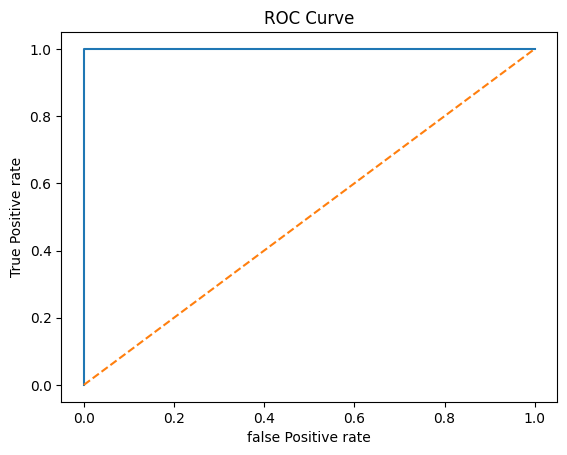

In [14]:
plt.plot(fpr,tpr,label=f'AUC:{auc:.2f}')
plt.plot([0,1],[0,1],linestyle = '--')
plt.xlabel("false Positive rate")
plt.ylabel("True Positive rate")
plt.title("ROC Curve")
plt.show()

In [15]:
odds_ratios=np.exp(Log_reg.coef_)

Odds Ratio represents the fator by which the odds of the dependent variable being true i.e., = 1

In [16]:
odds_ratios

array([[1.28549283, 0.99996637, 0.96345124, 1.14316912, 1.58386479,
        1.96059524, 1.58582016, 0.46398311, 1.0452619 ]])